<a href="https://colab.research.google.com/github/Alextree81/BA810-supervised-machine-learning/blob/main/BA_810_Team_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predict the housing price in Washington DC area**

Team 6: Shu(Alex) Wang, Nan Dong, Weichu Zou, Fanfei Zhao

# **Table of Contents**
Part 1: Problem Definition

Part 2: Data Description & preprocessing

Part 3: Exploratory Data Analysis

Part 4: Data Modelling

Part 5: Challenge & Summary

Part 6: References


#**Part 1. Problem Definition**

Housing price is always a popular topic around the world. While beside the most common use of having a place to live and fulfilling basic needs, people also use real estate as a significant investment means. Thus, in this project, we will predict the house price changes in King County (Washington) under different variables, like the number of bedrooms, the square footage, the house view, etc., and present our results as a reference so that people could have an understanding of what factors would most likely lead to the increase or decrease of house prices. We will use Python as the base language to analyze the dataset by creating distribution graphs and correlation tables, running various regression analysis models, etc. Our goal is to find predictive relationships between variables and house prices in King County based on our analysis.

#**Part 2. Data Description**

####**2.1 Import Python Libraries**

In [ ]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline
plt.style.use('seaborn-white')

#### **2.2 Import housing price Dataset**

In [ ]:
#import dataset
from google.colab import drive
drive.mount('/content/drive')
data_folder = '/content/drive/Shareddrives/BA 810 T6/'
house_raw = pd.read_csv(data_folder+'kc_house_data.csv')


Mounted at /content/drive


In [ ]:
#return some basic information of the dataset
house_raw.info()
house_raw.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


From the data info table, we can see that the dataset contains 21613 entries and 20 columns. Within these 20 columns--or variables--most of them are numerical variables. For instance, `price`, `bedrooms` and `bathrooms` are typical numerical variables. Besides numerical variables, there are also four categorical variables, including `waterfront`, `view`, `condition`, and `grade`.

#### **2.3 Data dictionary**

To further understand our dataset, a data dictionary is provided below. This dataset includes all relevant information of sold houses in King County(Washington) from 2014 to 2015.

`date` - Date of the home sale

`price` - Price of each home sold

`bedrooms` - Number of bedrooms

`bathrooms` - Number of bathrooms, where .5 accounts for a room with a toilet but no shower

`sqft_living` - Square footage of the apartments interior living space

`sqft_lot` - Square footage of the land space

`floors` - Number of floors

`waterfront` - A dummy variable for whether the apartment was overlooking the waterfront or not

`view` - An index from 0 to 4 of how good the view of the property was

`condition` - An index from 1 to 5 on the condition of the apartment,

`grade` - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.

`sqft_above` - The square footage of the interior housing space that is above ground level

`sqft_basement` - The square footage of the interior housing space that is below ground level

`yr_built` - The year the house was initially built

`yr_renovated` - The year of the house’s last renovation

`zipcode` - What zipcode area the house is in

`lat` - Lattitude

`long` - Longitude

`sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors

`sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors

### **2.4 Data cleaning and attributions**

#### **2.4.1 Dealing with null values**

In [ ]:
# Get number of missing values in each column
house_raw.isna().sum()


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

**➢ Observation:** No missing value detected in the dataset.

#### **2.4.2 Check Duplicates**

In [ ]:
duplicates = house_raw[house_raw.duplicated()]
print(len(duplicates))

0


There are no completely identical rows in our dataset.

In [ ]:
duplicates = house_raw[house_raw.duplicated(subset=['id'])]
print(len(duplicates))


177


We note that there are multiple entries with same id. This would be due to the fact that a house may have been sold twice and thus have two entries.

For now we will keep entries and allow the model to treat them as seperate data points.

#### **2.4.3 Dealing with outliers**

In [ ]:
house = house_raw.drop(['id'],axis =1)

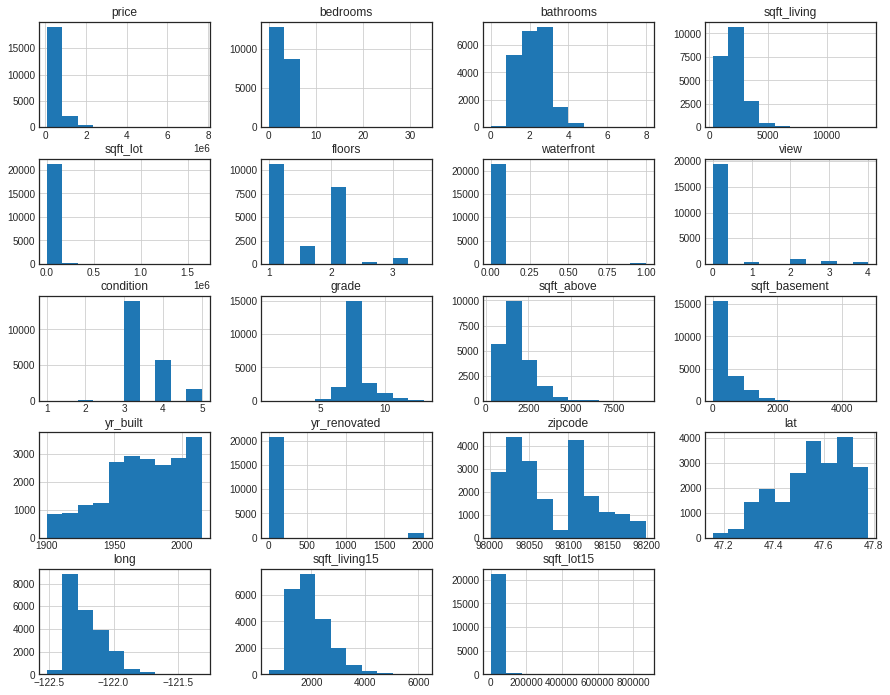

In [ ]:
house.hist(figsize = (15,12))
plt.show()

We note that grade, condition and floors appear to be on a reasonable scale with no apparent outliers and waterfront is binary 1/0 features.

We will consider potential outliers in bedrooms, bathrooms and the sqft-type features

In [ ]:
# Investigate bedrooms
house['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

The house with 33 bedrooms is worth exploring further.

In [ ]:
house[house['bedrooms'] == 33]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


With 1.75 bathrooms, a sale price of $640,000 it is likely that this house has 3 bedrooms and the 33 was a data entry error.

In [ ]:
# Fix typo for bedrooms
house.loc[15870, 'bedrooms'] = 3

#**Part 3. Exploratory Data Analysis**

###**3.1 Price feature based on location**

Location is critical when it comes to real estate. Our first question seeks to understand the geographical distribution of the homes in our dataset and determine where the highest house sales were recorded. We create a scatterplot using latitude and longitude features as a starting point.

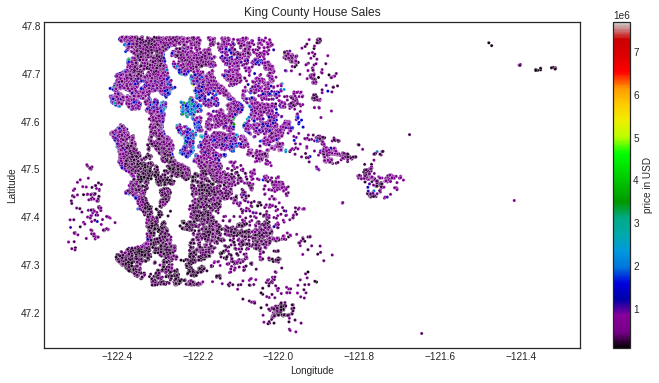

In [ ]:

plt.figure(figsize = (12,6))
ax = sns.scatterplot(x = house['long'], y = house['lat'], hue = house['price'],
                palette = 'nipy_spectral',s=10, legend = None, data = house)

norm = plt.Normalize(house['price'].min(), house['price'].max())
smap = plt.cm.ScalarMappable(cmap='nipy_spectral', norm=norm)
smap.set_array([])

ax.figure.colorbar(smap, label = 'price in USD')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('King County House Sales')
plt.show()

This visualization allows us to draw initial insights based on the houses' geographical locations. The highest house prices are concentrated in the area, with a latitude of around 47.6 and a longitude of around -122.25. There is a disparity with southern locations achieving lower house prices. The listings in our data are mostly located between latitude 47.2 and 47.8 and longitude between -122.4 and -121.8.

###**3.2 Waterfront feature**


We have been provided with a waterfront feature, which characterises houses which have a view of a waterfront. Let us investigate how this feature relates to price by using a boxplot.

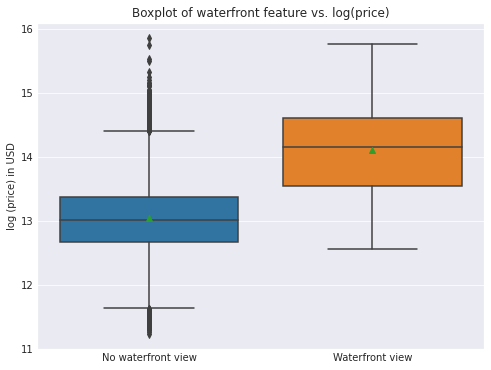

In [ ]:
plt.figure(figsize = (8,6))
sns.boxplot(x = house['waterfront'], y = house['log_price'],showmeans = True)
plt.title("Boxplot of waterfront feature vs. log(price)")
plt.ylabel("log (price) in USD")
plt.xlabel(None)
plt.xticks(np.arange(2), ('No waterfront view', 'Waterfront view'))

plt.show()

In [ ]:
waterfrontmean = house[house['waterfront'] == 1]['price'].mean()
nonwaterfrontmean = house[house['waterfront'] == 0]['price'].mean()
print(f"The mean house price for a house with waterfront view is USD {round(waterfrontmean,2)}")
print(f"The mean house price for a house without waterfront view is USD {round(nonwaterfrontmean,2)}")

The mean house price for a house with waterfront view is USD 1662524.18
The mean house price for a house without waterfront view is USD 531653.41


In [ ]:
len(house[house['waterfront'] == 1])/len(house)*100

0.7541757275713691

The median house price for houses with a waterfront view is almost double that of those without this feature. However note that only 0.7% of properties in our dataset have a waterfront view.

###**3.3 Zipcode effect on house price**

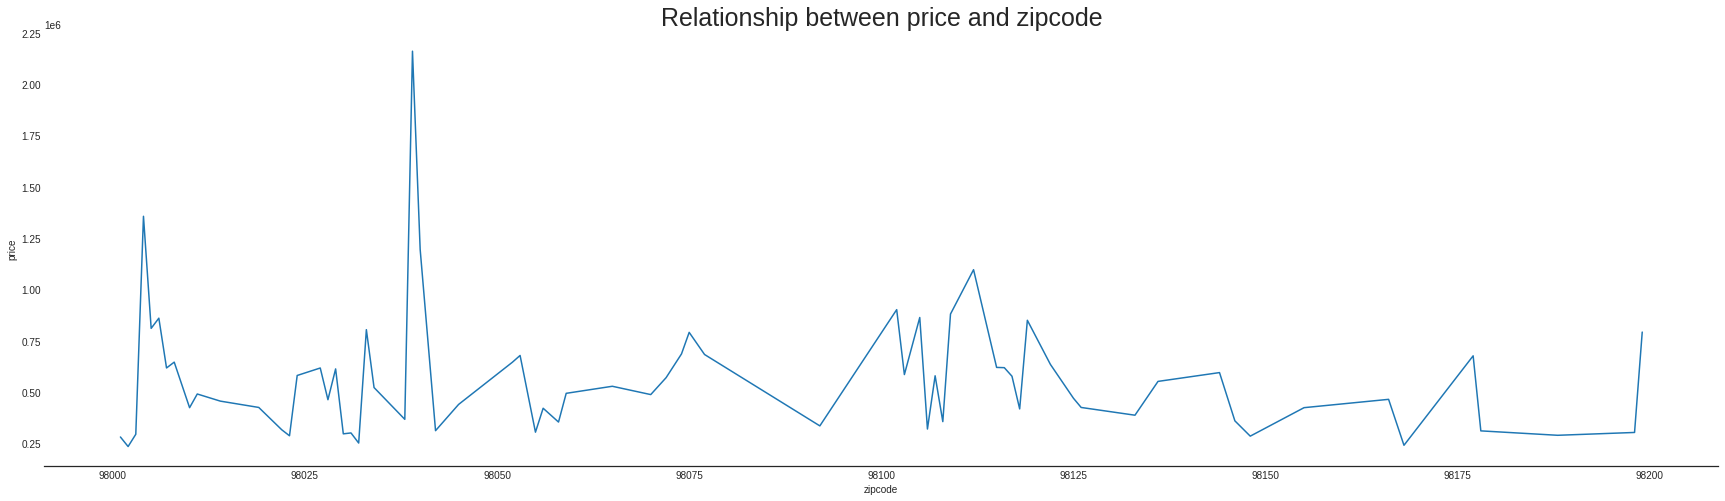

In [ ]:
plt.figure(figsize=(30,8))
sns.lineplot(x="zipcode",y="price",data= house,ci =None)
plt.title('Relationship between price and zipcode',size = 25)
sns.despine(left=True)

As we can see from the table, the prices fluctuate significantly from zip code 98000 to zip code 98200. Moreover, there is a very high peak between 98025 and 98050, indicating that the prices of houses in this area are very high. The possible reason is that the zip code means location, and different location suggests different prices. In the graph, the high price zip code may represent that the residence's income level is high, the external factors like views are tremendous, and transportation is convenient.

###**3.4 Price trend over time**

In [ ]:
house['date']=pd.to_datetime(house['date'])
house['year']=house['date'].apply(lambda date: date.year)
house['month']=house['date'].apply(lambda date: date.month)

In [ ]:
house['month'] = pd.DatetimeIndex(house['date']).month
house['month_year'] = pd.to_datetime(house['date']).dt.to_period('M')

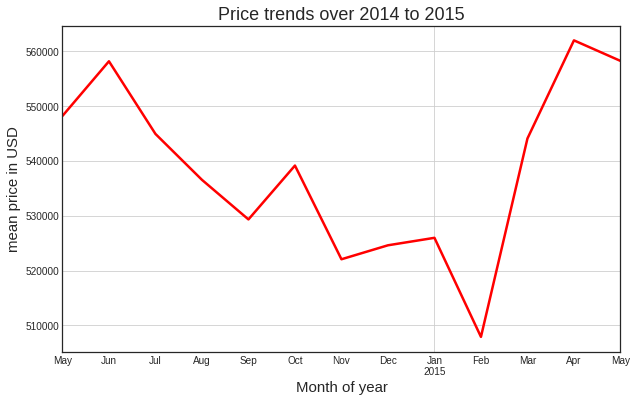

In [ ]:
plt.figure(figsize=(10,6))
ax = house.groupby('month_year').mean()['price'].plot(linewidth = 2.5,color = "r")
plt.title('Price trends over 2014 to 2015',size = 18)
plt.xlabel("Month of year",size = 15)
plt.ylabel("mean price in USD",size = 15)
plt.grid()


After transforming the date variable, we create a line plot to see the price trend over the year. We found the house prices in King County (Washington) decreased from May, 2014 to Feb,2015 and then started increasing until May, 2015. The graph shows the oscillation of the Washington house price. We also searched some information online that the housing market at that time was still suffering the low inventory, and then the sales were also low.

###**3.5 Conclusion**

Waterfront living is critical, with the median house price for a house with a waterfront view being almost double that of one that does not have this feature.
The most expensive neighborhoods we recommend focusing the campaign on are Medina, Clyde Hill, and Mercer Island.
Location within King County is essential, with a vast disparity among zip codes. The median house price ranges from 235,000 in 98002 to 1,260,000 in 98039.

#**Part 4. Data Modelling**

###**4.1 Train & Test Split**

In [ ]:
house["log_price"] = np.log(house["price"])

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(house, test_size=0.2, random_state=42)

housing_price = house["price"].copy()

###**4.2 Data Transformation**

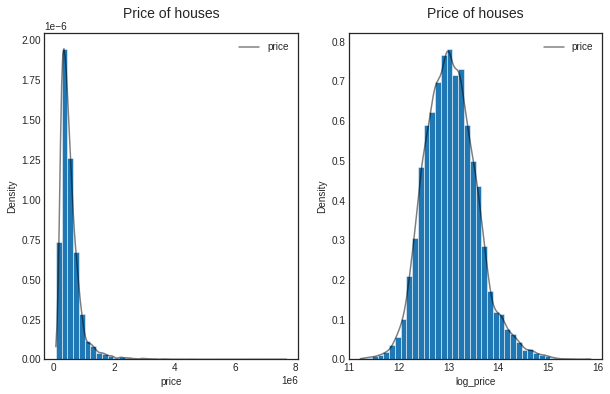

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(1, 2, 1)
ax = sns.histplot(data=house['price'], bins=40, stat='density', alpha= 1, kde=True,
                  edgecolor='white', linewidth=0.5,
                  line_kws=dict(color='black', alpha=0.5, linewidth=1.5, label='price'))
ax.get_lines()[0].set_color('black') # edit line color due to bug in sns v 0.11.0

# Edit legemd and add title
ax.legend(frameon=False)
ax.set_title('Price of houses', fontsize=14, pad=15)
plt.subplot(1, 2, 2)
ax2 = sns.histplot(data=house['log_price'], bins=40, stat='density', alpha= 1, kde=True,
                  edgecolor='white', linewidth=0.5,
                  line_kws=dict(color='black', alpha=0.5, linewidth=1.5, label='price'))
ax2.get_lines()[0].set_color('black') # edit line color due to bug in sns v 0.11.0

# Edit legemd and add title
ax2.legend(frameon=False)
ax2.set_title('Price of houses', fontsize=14, pad=15)

plt.show()

The two distribution graphs show that the price distribution becomes more normal than the original one after applying the log price. The result proves our solution to the data challenges that log price can provide more accuracy and reasonable results.

###**4.3 Feature Selection**

We use the feature selection method to select variables highly correlated to our response variable, price. We use a correlation matrix to help visualize the correlation between price and other variables.

In [ ]:
#Correlation table of the dataset
house.corr().price.sort_values(ascending = False)

price            1.000000
log_price        0.891680
sqft_living      0.702044
grade            0.667463
sqft_above       0.605566
sqft_living15    0.585374
bathrooms        0.525134
view             0.397346
sqft_basement    0.323837
bedrooms         0.315427
lat              0.306919
waterfront       0.266331
floors           0.256786
yr_renovated     0.126442
sqft_lot         0.089655
sqft_lot15       0.082456
yr_built         0.053982
condition        0.036392
long             0.021571
year             0.003554
month           -0.010053
zipcode         -0.053168
Name: price, dtype: float64

Based on the correlation result, we include sqft_living, grade, bedroom, bathroom, sqft_above, sqft_living15, and sqft_basement as numerical variables. Waterfront, floors, view, and grade as categorical variables.

In [ ]:
train_use = train_set.drop(["date","month","year","month_year","price","log_price"],axis = 1)
test_use = test_set.drop(["date","month","year","month_year","price","log_price"],axis = 1)

Feature 0: 2287.956837
Feature 1: 7545.064825
Feature 2: 16101.888824
Feature 3: 174.593178
Feature 4: 1802.493435
Feature 5: 484.310456
Feature 6: 2291.977983
Feature 7: 26.418085
Feature 8: 16635.387026
Feature 9: 9640.129403
Feature 10: 1912.283110
Feature 11: 101.812406
Feature 12: 232.109210
Feature 13: 25.417978
Feature 14: 4471.208222
Feature 15: 45.022873
Feature 16: 10559.372657
Feature 17: 134.875435


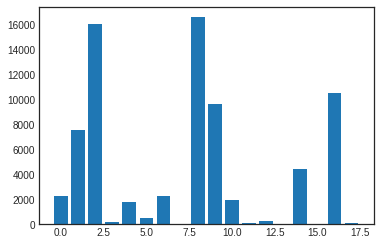

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot
 
# feature selection
def select_features(X_train, y_train, X_test):
 # configure to select all features
 fs = SelectKBest(score_func=f_regression, k='all')
 # learn relationship from training data
 fs.fit(X_train, y_train)
 # transform train input data
 X_train_fs = fs.transform(X_train)
 # transform test input data
 X_test_fs = fs.transform(X_test)
 return X_train_fs, X_test_fs, fs
 

X_train_fs, X_test_fs, fs = select_features(train_use, train_set.log_price, test_use)
# what are scores for the features
for i in range(len(fs.scores_)):
 print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [ ]:
train_use.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6325,3,1.75,1780,13095,1.0,0,0,4,9,1780,0,1983,0,98042,47.3670,-122.152,2750,13095
13473,2,1.00,1000,3700,1.0,0,0,3,6,800,200,1929,0,98118,47.5520,-122.290,1270,5000
17614,3,1.00,1080,7486,1.5,0,0,3,6,990,90,1942,0,98146,47.4838,-122.335,1170,7800
16970,3,2.25,2090,7500,1.0,0,0,4,7,1280,810,1977,0,98031,47.3951,-122.172,1800,7350
20868,2,2.50,1741,1439,2.0,0,0,3,8,1446,295,2007,0,98034,47.7043,-122.209,2090,10454


###**4.4 Pipeline and data preprocessing**

In [ ]:
# build the pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])


num_attribs = ["bedrooms", "bathrooms", "sqft_living", "sqft_above",
               "sqft_basement", "sqft_living15"]
cat_attribs = ["floors","waterfront","view","grade"]

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

In [ ]:
#Describe some basic data numerical's information
house.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,log_price
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.401822e+05,3.369454,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,...,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,2014.322954,6.574423,13.047886
std,3.673622e+05,0.907964,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,...,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,0.467616,3.115308,0.526822
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,...,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000,1.000000,11.225243
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,2014.000000,4.000000,12.682152
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,...,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,2014.000000,6.000000,13.017003
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,...,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,2015.000000,9.000000,13.377006
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,...,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000,12.000000,15.856731


From the table above, we can see some interesting trends in the numerical values. For instance, the price standardization is 3.67, which is not quite different from the mean (5.40). Close numbers like these reflect that the data points are scattered. Therefore, we can conclude that the dataset contains many outliers. While most of the outcomes for `floors`, `bedrooms` are integers, bedrooms have different outputs like "1.75" or "2.25". This is because some houses have 0.5 bathroom features. Besides, from the production of the view and waterfront, it is obvious that most houses do not have these features. Additionally, about 75% of houses have two floors.




The correlation value between the price and all variables is positive, indicating that the price increases with the number of bedrooms, bathrooms, square footage of the apartment's interior living space, etc. increasing.

Moreover, we dropped some variables with low correlation p-values with the price later when we standardized the variables data because we tried to make meaningful data results.



Since our dataset contains more than 20,000 entries, our main challenge during processing data is that it includes many outliers compared to its size. Thus, we decide to use the house price log to reduce the dataset error rate and the following regression models.


###**4.5 Model Performance**

####**4.5.1 Model 1:Simple Linear Regression**

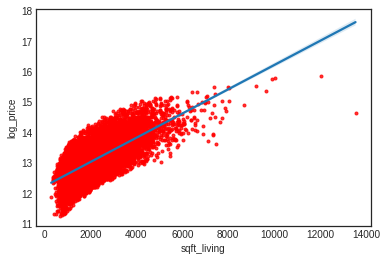

In [ ]:
sns.regplot(x=house.sqft_living, y=house.log_price, order=1, ci=99, scatter_kws={'color':'r', 's':9})

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

est = smf.ols('log_price ~ sqft_living', house).fit()
print(est.summary().tables[1])

                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      12.2183      0.006   1916.454      0.000      12.206      12.231
sqft_living     0.0004    2.8e-06    142.248      0.000       0.000       0.000


Simple linear regression based on price with the highest correlation variable: sqft of living. As we can see, the relationship between log_price and sqft_living is positive. When the square footage of interior housing living space for the nearest 15 neighbor increase, the price will increase simultaneously.

In [ ]:
import sklearn.linear_model as skl_lm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate


regr = skl_lm.LinearRegression()
X = house.sqft_living.values.reshape(-1,1) 
y = house.log_price # y being a vector is fine
regr.fit(X,y)
# in-sample R^2
price_pred = regr.predict(X)
print(r2_score(y, price_pred))
# out-sample R^2

result = cross_validate(LinearRegression(), X, y)
print(result['test_score'].mean())

est = smf.ols('log_price ~ sqft_living', train_set).fit()
print('in-sample r-square: {:.2f}'.format(est.rsquared))
predictions = est.predict(test_set) # automatically transforms the test data per the formula, i.e., calls the log and square etc.
print('out-of-sample r-square: {:.2f}'.format(r2_score(test_set.log_price, predictions)))

0.4835534556874277
0.4815805600683169
in-sample r-square: 0.48
out-of-sample r-square: 0.49


The in-sample $R^2$ is a  bit lower than out-of-sample $R^2$ but basically the same, which means the model could not only be used for trained data but also is effective regarding out-sample data in the case of forecasting.

####**4.5.2 Model 2:Linear Regression**

In [ ]:
housing_prepared = preprocessing.fit_transform(train_set)

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

def monkey_patch_get_signature_names_out():
    """Monkey patch some classes which did not handle get_feature_names_out()
       correctly in Scikit-Learn 1.0.*."""
    from inspect import Signature, signature, Parameter
    import pandas as pd
    from sklearn.impute import SimpleImputer
    from sklearn.pipeline import make_pipeline, Pipeline
    from sklearn.preprocessing import FunctionTransformer, StandardScaler

    default_get_feature_names_out = StandardScaler.get_feature_names_out

    if not hasattr(SimpleImputer, "get_feature_names_out"):
      print("Monkey-patching SimpleImputer.get_feature_names_out()")
      SimpleImputer.get_feature_names_out = default_get_feature_names_out

    if not hasattr(FunctionTransformer, "get_feature_names_out"):
        print("Monkey-patching FunctionTransformer.get_feature_names_out()")
        orig_init = FunctionTransformer.__init__
        orig_sig = signature(orig_init)

        def __init__(*args, feature_names_out=None, **kwargs):
            orig_sig.bind(*args, **kwargs)
            orig_init(*args, **kwargs)
            args[0].feature_names_out = feature_names_out

        __init__.__signature__ = Signature(
            list(signature(orig_init).parameters.values()) + [
                Parameter("feature_names_out", Parameter.KEYWORD_ONLY)])

        def get_feature_names_out(self, names=None):
            if callable(self.feature_names_out):
                return self.feature_names_out(self, names)
            assert self.feature_names_out == "one-to-one"
            return default_get_feature_names_out(self, names)

        FunctionTransformer.__init__ = __init__
        FunctionTransformer.get_feature_names_out = get_feature_names_out
    
    if not hasattr(IterativeImputer, "get_feature_names_out"):
      print("Monkey-patching IterativeImputer.get_feature_names_out()")
      IterativeImputer.get_feature_names_out = default_get_feature_names_out
monkey_patch_get_signature_names_out()

Monkey-patching SimpleImputer.get_feature_names_out()
Monkey-patching FunctionTransformer.get_feature_names_out()
Monkey-patching IterativeImputer.get_feature_names_out()


In [ ]:
housing_prepared_fr = pd.DataFrame(
    housing_prepared,
    columns=preprocessing.get_feature_names_out(),
    index=train_set.index)
housing_prepared_fr.head(2)

,num__bedrooms,num__bathrooms,num__sqft_living,num__sqft_above,num__sqft_basement,num__sqft_living15,cat__floors_1.0,cat__floors_1.5,cat__floors_2.0,cat__floors_2.5,...,cat__grade_4.0,cat__grade_5.0,cat__grade_6.0,cat__grade_7.0,cat__grade_8.0,cat__grade_9.0,cat__grade_10.0,cat__grade_11.0,cat__grade_12.0,cat__grade_13.0
6325,-0.395263,-0.474451,-0.323933,-0.007257,-0.656310,1.126073,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
13473,-1.468964,-1.452583,-1.183653,-1.200048,-0.200433,-1.046523,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(train_set, train_set.log_price)

housing_predictions = lin_reg.predict(train_set)

from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(train_set.log_price, housing_predictions,
                              squared=False)
print('Training data error {:.8f}'.format(lin_rmse))
housing_lin_predictions_test = lin_reg.predict(test_set)
lin_test_rmses = mean_squared_error(test_set.log_price,housing_lin_predictions_test,
                              squared = False)
print('Test data error {:.8f}'.format(lin_test_rmses))


r2_lin_value = r2_score(train_set.log_price, housing_predictions)
print('R^2 value is {:.8f}'.format(r2_lin_value))
r2_lin_value_test = r2_score(test_set.log_price, housing_lin_predictions_test)
print('test R^2 value is {:.8f}'.format(r2_lin_value_test))

Training data error 0.33021954
Test data error 0.33326770
R^2 value is 0.60430438
test R^2 value is 0.61054945


Similar to the linear regression model, the Training and test data errors are almost Training data errors, and test data errors are very alike; the difference between in-sample and out-of-sample $R^2$ is within 0.01 in the linear regression model. These results reflect that the model is stable regardless of the training data. The value of both $R^2$ means that the linear regression model can predict house price changes.

####**4.5.3 Model 3: Ridge Regression** 

In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_val_score

ridge_reg = make_pipeline(preprocessing, RidgeCV(alphas=(.1, 1, 10)))
ridge_reg.fit(train_set, train_set.log_price)
housing_ridge_predictions = ridge_reg.predict(train_set)
ridge_rmse = mean_squared_error(train_set.log_price, housing_ridge_predictions, squared=False)
print('Training data error {:.8f}'.format(ridge_rmse))

housing_ridge_predictions_test = ridge_reg.predict(test_set)
ridge_test_rmses = mean_squared_error(test_set.log_price,housing_ridge_predictions_test,
                              squared = False)
print('Test data error {:.8f}'.format(ridge_test_rmses))

r2_ridge_value = r2_score(train_set.log_price, housing_ridge_predictions)
print('train R^2 value is {:.8f}'.format(r2_ridge_value))

r2_ridge_value_test = r2_score(test_set.log_price, housing_ridge_predictions_test)
print('test R^2 value is {:.8f}'.format(r2_ridge_value_test))

Training data error 0.33035854
Test data error 0.33325593
train R^2 value is 0.60397118
test R^2 value is 0.61057696


Similar to the linear regression model, the training and test data errors are almost identical (.003 difference); the difference between in-sample and out-of-sample r-square is about 0.01. These results reflect that the model is stable regardless of data training. The value of both $R^2$ means that the Ridge regression model can predict house price changes.

####**4.5.4 Model 4: Lasso Regression** 

In [ ]:
from sklearn.linear_model import Lasso

lasso_reg = make_pipeline(preprocessing, Lasso(alpha = 1))
lasso_reg.fit(train_set,train_set.log_price)
housing_lasso_predictions = lasso_reg.predict(train_set)
lasso_rmse = mean_squared_error(train_set.log_price, housing_lasso_predictions, squared=False)
print('Training data error {:.8f}'.format(lasso_rmse))

housing_lasso_predictions_test = lasso_reg.predict(test_set)
lasso_test_rmses = mean_squared_error(test_set.log_price,housing_lasso_predictions_test,
                              squared = False)
print('Test data error {:.8f}'.format(lasso_test_rmses))

r2_lasso_value = r2_score(train_set.log_price, housing_lasso_predictions)
print('train R^2 value is {:.8f}'.format(r2_lasso_value))

r2_lasso_value_test = r2_score(test_set.log_price, housing_lasso_predictions_test)
print('test R^2 value is {:.8f}'.format(r2_lasso_value_test))

Training data error 0.52495508
Test data error 0.53419653
train R^2 value is 0.00000000
test R^2 value is -0.00061727


Interesting observation: why seeing  $R^2$  = 0?

The original model needs a reasonably small coefficient on X because its scale is so large that the data don't receive many penalties from the lasso. After standardization, the model now wants a more significant coefficient on X, which means the lasso penalty contributes more. Then getting an $R^2$  of 0 suggests that the lasso penalty is large enough to push the coefficient to zero, so the model is just a horizontal line. If you reduce the regularization strength a bit, you should be able to recover the old model.

####**4.5.5 Model 5: DecisionTree Regression** 

In [ ]:
from sklearn.tree import DecisionTreeRegressor,plot_tree

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=18))
tree_reg.fit(train_set,train_set.log_price)
housing_tree_predictions = tree_reg.predict(train_set)
tree_rmse = mean_squared_error(train_set.log_price, housing_tree_predictions, squared=False)
print('Training data error {:.8f}'.format(tree_rmse))

housing_tree_predictions_test = tree_reg.predict(test_set)
tree_test_rmses = mean_squared_error(test_set.log_price,housing_tree_predictions_test,
                              squared = False)
print('Test data error {:.8f}'.format(tree_test_rmses))

r2_tree_value = r2_score(train_set.log_price, housing_tree_predictions)
print('R^2 value is {:.8f}'.format(r2_tree_value))
r2_tree_value_test = r2_score(test_set.log_price, housing_tree_predictions_test)
print('test R^2 value is {:.8f}'.format(r2_tree_value_test))


Training data error 0.04679018
Test data error 0.45225788
R^2 value is 0.99205553
test R^2 value is 0.28280351


The training data error is relatively low (0.04). Considered its extremely high r-square value (0.99), the results suggest that the decisiontree regressor is over-fitting and may not be suitable for this analysis.

####**4.5.6Model 6: Random Forest Regression** 

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing,
                           RandomForestRegressor(random_state=18))
forest_reg.fit(train_set,train_set.log_price)
housing_forest_predictions = forest_reg.predict(train_set)
forest_rmse = mean_squared_error(train_set.log_price, housing_forest_predictions, squared=False)
print('Training data error {:.8f}'.format(forest_rmse))

housing_forest_predictions_test = forest_reg.predict(test_set)
forest_test_rmses = mean_squared_error(test_set.log_price,housing_forest_predictions_test,
                              squared = False)
print('Test data error {:.8f}'.format(forest_test_rmses))

r2_forest_value = r2_score(train_set.log_price, housing_forest_predictions)
print('R^2 value is {:.8f}'.format(r2_forest_value))
r2_forest_value_test = r2_score(test_set.log_price, housing_forest_predictions_test)
print('test R^2 value is {:.8f}'.format(r2_forest_value_test))


Training data error 0.13010512
Test data error 0.33584577
R^2 value is 0.93857510
test R^2 value is 0.60450078


In the Random Forest Regressor, we see the final output that test data error is more significant than train data error which means that the model is overfitting for the dataset even though the $R^2$ is super high. Still, we do not consider this model at this time.

####**4.5.7 Model 7: SVM(Support Vector Machines)** 

In [ ]:
from sklearn.svm import SVR
svr_reg = make_pipeline(preprocessing,
                           SVR(kernel="rbf"))
svr_reg.fit(train_set,train_set.log_price)
housing_svr_predictions = svr_reg.predict(train_set)
svr_rmse = mean_squared_error(train_set.log_price, housing_svr_predictions, squared=False)
print('Training data error {:.8f}'.format(svr_rmse))

housing_svr_predictions_test = svr_reg.predict(test_set)
svr_test_rmses = mean_squared_error(test_set.log_price,housing_svr_predictions_test,
                              squared = False)
print('Test data error {:.8f}'.format(svr_test_rmses))

r2_svr_value = r2_score(train_set.log_price, housing_svr_predictions)
print('R^2 value is {:.8f}'.format(r2_svr_value))
r2_svr_value_test = r2_score(test_set.log_price, housing_svr_predictions_test)
print('test R^2 value is {:.8f}'.format(r2_svr_value_test))

Training data error 0.30489537
Test data error 0.32377017
R^2 value is 0.66266814
test R^2 value is 0.63243043


The SVM model works well here because the train and test data errors do not have significant differences, which means that the model's performance is good, and 0.66 $R^2$ is a more substantial number that proves the results' accuracy.


####**4.5.8 Model 8: Gradient Boosting Regressor** 

In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor

hgb_reg = make_pipeline(preprocessing,
                    HistGradientBoostingRegressor(max_leaf_nodes=16, max_iter=10, learning_rate=.1))
hgb_reg.fit(train_set,train_set.log_price)
housing_hgb_predictions = hgb_reg.predict(train_set)
hgb_rmse = mean_squared_error(train_set.log_price, housing_hgb_predictions, squared=False)
print('Training data error {:.8f}'.format(hgb_rmse))

housing_hgb_predictions_test = hgb_reg.predict(test_set)
hgb_test_rmses = mean_squared_error(test_set.log_price,housing_hgb_predictions_test,
                              squared = False)
print('Test data error {:.8f}'.format(hgb_test_rmses))

r2_hgb_value = r2_score(train_set.log_price, housing_hgb_predictions)
print('R^2 value is {:.8f}'.format(r2_hgb_value))

r2_hgb_value_test = r2_score(test_set.log_price, housing_hgb_predictions_test)
print('test R^2 value is {:.8f}'.format(r2_hgb_value_test))

Training data error 0.37135009
Test data error 0.37706036
R^2 value is 0.49959369
test R^2 value is 0.50147420


The boosting model's performance is not good compare with other models even the train and test data errors do not have big differences. The main reason is the low R square value that only have 0.5 which means the accuracy of the results are not very credible. 


####**4.5.9 Model 9: XGBregressor** 

In [ ]:
from xgboost import XGBRegressor

xgbr = XGBRegressor(verbosity=0) 

xgb_reg = make_pipeline(preprocessing,
                    XGBRegressor())
xgb_reg.fit(train_set,train_set.log_price)
housing_xgb_predictions = xgb_reg.predict(train_set)
xgb_rmse = mean_squared_error(train_set.log_price, housing_xgb_predictions, squared=False)
print('Training data error {:.8f}'.format(xgb_rmse))

housing_xgb_predictions_test = xgb_reg.predict(test_set)
xgb_test_rmses = mean_squared_error(test_set.log_price,housing_xgb_predictions_test,
                              squared = False)
print('Test data error {:.8f}'.format(xgb_test_rmses))

r2_xgb_value = r2_score(train_set.log_price, housing_xgb_predictions)
print('R^2 value is {:.8f}'.format(r2_xgb_value))

r2_xgb_value_test = r2_score(test_set.log_price, housing_xgb_predictions_test)
print('test R^2 value is {:.8f}'.format(r2_xgb_value_test))

[23:12:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training data error 0.31796145
Test data error 0.32605123
R^2 value is 0.63313636
test R^2 value is 0.62723291


The bagging, boosting model is not bad. We first checked the train and test data errors, and the errors do not have significant differences, which means that the model's performance is good. The R square here is 0.63, which is an ok number that the model results are acceptable for analysis.


####**4.5.10 Model 10: Voting regressor**

In [ ]:
from scipy.spatial import SphericalVoronoi
from sklearn.ensemble import VotingRegressor

from sklearn.svm import SVR

voting_reg = make_pipeline(preprocessing,VotingRegressor(
    estimators=[
        ('lm', LinearRegression()),
        ('svr', SVR(kernel = "rbf")),
        ('hgb', HistGradientBoostingRegressor(random_state=42))
    ]
    # default is hard voting, but you can use soft voting by passing voting = 'soft'
))

voting_reg.fit(train_set, train_set.log_price)  # fit each member model and keep it for application

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_above',
                                                   'sqft_basement',
                                                   'sqft_living15']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
            

In [ ]:
housing_vot_predictions = voting_reg.predict(train_set)
vot_rmse = mean_squared_error(train_set.log_price, housing_vot_predictions, squared=False)
print('Training data error {:.8f}'.format(vot_rmse))

housing_vot_predictions_test = voting_reg.predict(test_set)
vot_test_rmses = mean_squared_error(test_set.log_price,housing_vot_predictions_test,
                              squared = False)
print('Test data error {:.8f}'.format(vot_test_rmses))

r2_vot_value = r2_score(train_set.log_price, housing_vot_predictions)
print('R^2 value is {:.8f}'.format(r2_vot_value))

r2_vot_value_test = r2_score(test_set.log_price, housing_vot_predictions_test)
print('test R^2 value is {:.8f}'.format(r2_vot_value_test))

Training data error 0.30620606
Test data error 0.31981475
R^2 value is 0.65976164
test R^2 value is 0.64135659


In the voting model, the train and test data errors is fine with the R square value is 0.66 which also a good number that measn the model fits our dataset. 

###**4.6 Comparison between models**

In [ ]:
Regressor = ["Linear","Ridge","Lasso","DecisionTree","RandomForest","SVR","GradientBoost","XGBoost","Voting"]

Training_MSE = [lin_rmse,ridge_rmse,lasso_rmse,tree_rmse,forest_rmse,svr_rmse,hgb_rmse,xgb_rmse,vot_rmse]
Testing_MSE = [lin_test_rmses,ridge_test_rmses,lasso_test_rmses,tree_test_rmses,forest_test_rmses,svr_test_rmses,hgb_test_rmses,xgb_test_rmses,vot_test_rmses]

Train_Rsq = [r2_lin_value,r2_ridge_value,r2_lasso_value,r2_tree_value,r2_forest_value,r2_svr_value,r2_hgb_value,r2_xgb_value,r2_vot_value]

Test_Rsq = [r2_lin_value_test,r2_ridge_value_test,r2_lasso_value_test,r2_tree_value_test,r2_forest_value_test,r2_svr_value_test,r2_hgb_value_test,r2_xgb_value_test,r2_vot_value_test]


d = {'Regressor':Regressor,'Train_MSE':Training_MSE,'Test_MSE':Testing_MSE,'Train_Rsq':Train_Rsq,'Test_Rsq':Test_Rsq}
df = pd.DataFrame(d)
print(df)

       Regressor  Train_MSE  Test_MSE  Train_Rsq  Test_Rsq
0         Linear   0.330326  0.333242   0.604049  0.610610
1          Ridge   0.330359  0.333256   0.603971  0.610577
2          Lasso   0.524955  0.534197   0.000000 -0.000617
3   DecisionTree   0.046790  0.452258   0.992056  0.282804
4   RandomForest   0.130105  0.335846   0.938575  0.604501
5            SVR   0.305003  0.323764   0.662430  0.632445
6  GradientBoost   0.371350  0.377060   0.499594  0.501474
7        XGBoost   0.317961  0.326051   0.633136  0.627233
8         Voting   0.306206  0.319815   0.659762  0.641357


From this summary table, the top 3 models which show good performance (high r-square value) are SVR, Voting, and Linear. We do not prefer the Voting model because Voting is the combination of GradientBoost, SVR, and Linear regression. Nevertheless, we need to fine-tune hyperparameters on SVR & Voting model due to the combination, and we will fine-tune these parameters.

###**4.7 Assumptions on parametric models**

Parametric models need to follow some assumptions. For linear/ridge/lasso models, the residuals must be i.i.d with each other and follow a normal distribution. We will test whether these assumptions are satisfied based on our best-performance linear regression model.

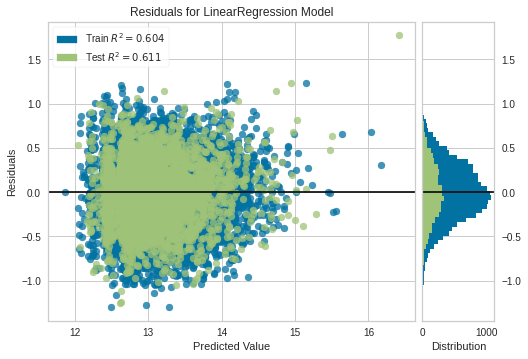

In [ ]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(lin_reg)

visualizer.fit(train_set, train_set.log_price)  # Fit the training data to the visualizer
visualizer.score(test_set, test_set.log_price)  # Evaluate the model on the test data
visualizer.show() 

###**4.8 Fine-tune parameters**

####**4.8.1 Grid Search**

In [ ]:
full_pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('svm', SVR()),])


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid = [

        {'svr__kernel': ['rbf'], 'svr__C': [1.0, 3.0, 10., 30., 100., 300.,
                                            1000.0], 'svr__gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]
    

svr_pipeline = Pipeline([("preprocessing", preprocessing), ("svr", SVR())])
grid_search = GridSearchCV(svr_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error',n_jobs = -1)
 
grid_search.fit(train_set[:1000], train_set.log_price[:1000])
grid_search.best_params_

{'svr__C': 3.0, 'svr__gamma': 0.01, 'svr__kernel': 'rbf'}

In [ ]:
reg_grid_cv_res = pd.DataFrame(grid_search.cv_results_)
reg_grid_cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
reg_grid_cv_res.filter(regex = '(^param_|mean_test_score)', axis=1)

,param_svr__C,param_svr__gamma,param_svr__kernel,mean_test_score
6,3.0,0.01,rbf,-0.348870
12,10.0,0.01,rbf,-0.351137
1,1.0,0.03,rbf,-0.351383
0,1.0,0.01,rbf,-0.352291
7,3.0,0.03,rbf,-0.352859
2,1.0,0.1,rbf,-0.356680
18,30.0,0.01,rbf,-0.360212
13,10.0,0.03,rbf,-0.362098
8,3.0,0.1,rbf,-0.366637
24,100.0,0.01,rbf,-0.369107


In [ ]:
svr_reg2 = make_pipeline(preprocessing,
                           SVR(kernel="rbf",gamma = 0.01,C = 3.0))
svr_reg2.fit(train_set,train_set.log_price)
housing_svr2_predictions = svr_reg2.predict(train_set)
svr2_rmse = mean_squared_error(train_set.log_price, housing_svr2_predictions, squared=False)
print('Training data error {:.8f}'.format(svr2_rmse))

housing_svr2_predictions_test = svr_reg2.predict(test_set)
svr2_test_rmses = mean_squared_error(test_set.log_price,housing_svr2_predictions_test,
                              squared = False)
print('Test data error {:.8f}'.format(svr_test_rmses))

r2_svr2_value = r2_score(train_set.log_price, housing_svr2_predictions)
print('R^2 value is {:.8f}'.format(r2_svr2_value))
r2_svr2_value_test = r2_score(test_set.log_price, housing_svr2_predictions_test)
print('test R^2 value is {:.8f}'.format(r2_svr2_value_test))

Training data error 0.31976451
Test data error 0.32376384
R^2 value is 0.62896383
test R^2 value is 0.63330391


The final result is 0.3237 on the testing set, which is almost identical to the original SVM model. We can find that the $R^2$ value here is lower than the original SVR model on the training dataset. The reason why $R^2$ is lower is that we reduce the entries. To be more specific, we only use 1000 entries to fit our data, and we will explain more details in the below challenge part. Nevertheless, the original result is similar with hyper tune data which is good news for us because the similar results mean our models are optimal. All in all, the SVR model has the highest performance among the three models(Linear regression, SVR, and HistGradientBoostingRegressor) in predicting house price changes under the different variables.

####**4.8.2 Halving Grid Search**

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

param_grid2 = [ 
    {'svr__C': np.logspace(-3, 3, 4), 
     'svr__gamma': np.logspace(-2, 2, 5)
     }, 
    ]
svr_pipeline = Pipeline([("preprocessing", preprocessing), ("svr", SVR())])
# Change to Halving strategy starting here
halving_grid_search = HalvingGridSearchCV(svr_pipeline, param_grid2, cv=3, 
                                    min_resources='exhaust', # use all data in the last round, back calculate to determine how much to start with
                                    scoring='neg_root_mean_squared_error')
halving_grid_search.fit(train_set, train_set.log_price)
print('The best parameters are ', halving_grid_search.best_params_)

The best parameters are  {'svr__C': 10.0, 'svr__gamma': 0.01}


In [ ]:
hal_grid_cv_res = pd.DataFrame(halving_grid_search.cv_results_)
hal_grid_cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
hal_grid_cv_res.filter(regex = '(^param_|mean_test_score)', axis=1).head()

,param_svr__C,param_svr__gamma,mean_test_score
29,10.0,0.01,-0.321892
10,10.0,0.01,-0.324842
28,0.1,0.1,-0.324982
26,10.0,0.01,-0.325860
27,1000.0,0.01,-0.328457


In [ ]:
svr_reg3 = make_pipeline(preprocessing,
                           SVR(kernel="rbf",gamma = 0.01,C = 10.0))
svr_reg3.fit(train_set,train_set.log_price)
housing_svr3_predictions = svr_reg3.predict(train_set)
svr3_rmse = mean_squared_error(train_set.log_price, housing_svr3_predictions, squared=False)
print('Training data error {:.8f}'.format(svr3_rmse))

housing_svr3_predictions_test = svr_reg3.predict(test_set)
svr3_test_rmses = mean_squared_error(test_set.log_price,housing_svr3_predictions_test,
                              squared = False)
print('Test data error {:.8f}'.format(svr3_test_rmses))

r2_svr3_value = r2_score(train_set.log_price, housing_svr3_predictions)
print('R^2 value is {:.8f}'.format(r2_svr3_value))
r2_svr3_value_test = r2_score(test_set.log_price, housing_svr3_predictions_test)
print('test R^2 value is {:.8f}'.format(r2_svr3_value_test))

Training data error 0.31746540
Test data error 0.32220644
R^2 value is 0.63428017
test R^2 value is 0.63597240


Based on our result in halving grid search,we are able to train the whole training set. The halving grid search gives a result of C=10 and gamma = 0.01.  This time,we get a higher $R^2$ value and lower mean squared error on the testing dataset, suggesting that halving grid search generally improves the performance of the SVR model.

#**Part 5. Challenges & Summary**

####**5.1 Challenges**


When we tried to run regression models, we experienced an unexpected challenge: the highly long process time of fine-tuning the SVR model. We tried 10000 entries the first time, which did not work, but it took around 30 minutes, and we still did not have a solution due to the dataset size. We recalled that Professor Sahoo mentioned in the labs that the SVR model does have this problem, and we could choose 5,000 entries to reduce the work of the model. However, the SVR model still could not produce a solution. Thus, we finally agreed on using 1,000 instead of 5,000 entries and reduced the parameters in the grid search simultaneously. In the end, the code went through, and the results suggest that when the kernel equals rbf, svr_c equals 3.0, and svr_gamma equals 0.01, the model fits the dataset the most and can give the best accurate predictions.


Furthermore, we also find that having grid search has less running time than grid search and that is the reason why we also use having grid search in hyperparameter selection section. Moreover, in the colab, we select 'runtime' and runtime type. The option named change hardware accelerator to GPU can also save time.

####**5.2 Summary and Conclusion**


To sum up, we have run the eight regression models, including Linear regression, Ridge regression, Lasso regression, DecisionTree regression, RandomForest regression, SVR, GradientBoost, XGBoost, and Voting, to predict the King County (Washington) house price changes. From the summary table, we found the top 3 models which show good performance (high r-square value) are SVR, Voting, and Linear. We do not prefer the Voting model because Voting is the combination of GradientBoost, SVR and Linear regression. We did fine-tuning on hyperparameters on SVR & Voting model due to the combination. After fine-tuning, we prefer SVR because of its highest performance among all eight models. The train and test data errors do not have significant differences, which means that the model's performance is good. The r-square value of the SVR model is 0.66, which demonstrates that the y variable(price) can be explained by x variables(`bedrooms`, `bathrooms`, `sqft_living`,
`sqft_above`,`sqft_basement`, `sqft_living15`, `floors`, `waterfront`, `view`, `grade`). Moreover, based on our result in halving the grid search, we can train the whole training set and get a higher R^2 value and lower mean squared error on the testing dataset. It indicates that halving grid search generally improve the performance of the SVR model.



After finishing the project, we learned how to train and test data in different regression models. Furthermore, we also know that standardized data is essential before running models because standardizing data can bring all the data to a standard scale without distorting the differences in the range of the values. Moreover, we think the most valuable experience is handling challenges when doing the project because we may also face obstacles in future work. That the large size of the dataset can bring some excessive data loading, and how to reduce the data load and choose the valuable parameters are the best solutions that can help us in future decision-making.

#**Part 6. References**

https://www.kaggle.com/datasets/harlfoxem/housesalesprediction 

https://www.kaggle.com/code/burhanykiyakoglu/predicting-house-prices/data

https://www.washington.edu/news/2014/05/12/washington-housing-market-weaker-in-first-quarter-of-2014/

https://rapidminer.com/blog/validate-models-training-test-error/

https://statisticsbyjim.com/regression/interpret-r-squared-regression/